In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('phishing_site_urls.csv')

In [3]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
df.shape

(549846, 2)

In [5]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

<Axes: ylabel='count'>

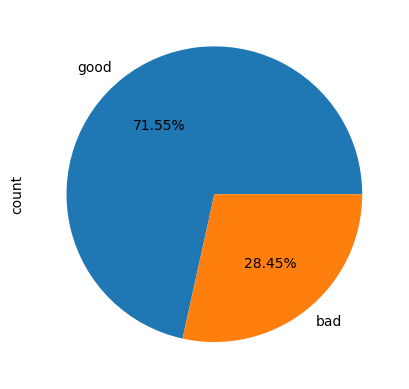

In [6]:
df['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [7]:
df_shuffled = shuffle(df, random_state=60)
data_size = 5000
df_sampled = df_shuffled[:data_size].copy()

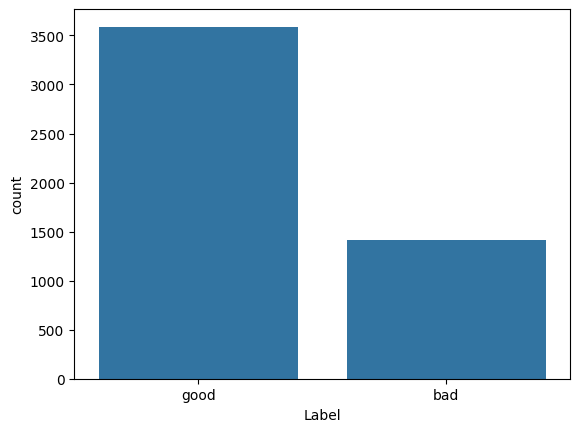

In [8]:
sns.countplot(data=df_sampled, x="Label")
plt.show()

In [9]:
df_sampled.info()
df_sampled.replace({'good':0, 'bad':1}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 411581 to 362722
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     5000 non-null   object
 1   Label   5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


C:\Users\prash\AppData\Local\Temp\ipykernel_12900\3522164830.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sampled.replace({'good':0, 'bad':1}, inplace=True)


In [10]:
X_raw = df_sampled[["URL"]]
Y = df_sampled["Label"]

In [11]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer("english")
cv = CountVectorizer()

def prepare_data(X_prep):
    X_prep['Tokenized'] = X_prep.URL.map(lambda t : tokenizer.tokenize(t)) 
    X_prep['Stemmed'] = X_prep.Tokenized.map(lambda s: [stemmer.stem(word) for word in s]) 
    X_prep['text_sent'] = X_prep.Stemmed.map(lambda ts: ' '.join(ts))
    features = cv.fit_transform(X_prep.text_sent)
    return X_prep, features
X_raw , X = prepare_data(X_raw)

In [12]:
X_train, X_test , y_train, y_test = train_test_split(X, Y, test_size = 0.2 ,random_state = 42)

In [13]:
ml_model = []
accuracy = []
f1_score = []
recall = []
precision = []


#function to add results
def storeResults(model,acc,f1,rec,prec):
    ml_model.append(model)
    accuracy.append(round(acc, 3))
    f1_score.append(round(f1, 3))
    recall.append(round(rec, 3))
    precision.append(round(prec ,3))

In [14]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)

print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()


f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.968
Logistic Regression : Accuracy on test Data: 0.889

Logistic Regression : f1_score on training Data: 0.940
Logistic Regression : f1_score on test Data: 0.781

Logistic Regression : Recall on training Data: 0.890
Logistic Regression : Recall on test Data: 0.680

Logistic Regression : precision on training Data: 0.995
Logistic Regression : precision on test Data: 0.917


In [15]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       709
           1       0.92      0.68      0.78       291

    accuracy                           0.89      1000
   macro avg       0.90      0.83      0.85      1000
weighted avg       0.89      0.89      0.88      1000



In [16]:
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,recall_score_train_log,precision_score_train_log)

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 1.000
K-Nearest Neighbors : Accuracy on test Data: 0.819

K-Nearest Neighbors : f1_score on training Data: 1.000
K-Nearest Neighbors : f1_score on test Data: 0.655

K-Nearest Neighborsn : Recall on training Data: 1.000
Logistic Regression : Recall on test Data: 0.591

K-Nearest Neighbors : precision on training Data: 1.000
K-Nearest Neighbors : precision on test Data: 0.735


In [18]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       709
           1       0.74      0.59      0.66       291

    accuracy                           0.82      1000
   macro avg       0.79      0.75      0.77      1000
weighted avg       0.81      0.82      0.81      1000



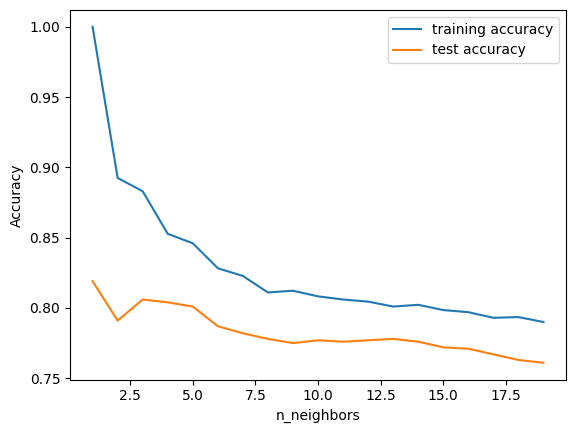

In [19]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

In [20]:
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,recall_score_train_knn,precision_score_train_knn)

In [21]:
svclf = SVC()
svclf.fit(X_train,y_train)
y_train_svc = svclf.predict(X_train)
y_test_svc = svclf.predict(X_test)

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("SVC : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("SVC : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

SVC : Accuracy on training Data: 0.952
SVC : Accuracy on test Data: 0.871

Support Vector Machine : f1_score on training Data: 0.906
Support Vector Machine : f1_score on test Data: 0.731

Support Vector Machine : Recall on training Data: 0.837
Support Vector Machine : Recall on test Data: 0.601

Support Vector Machine : precision on training Data: 0.988
Support Vector Machine : precision on test Data: 0.931


In [22]:
print(metrics.classification_report(y_test, y_test_svc))


              precision    recall  f1-score   support

           0       0.86      0.98      0.92       709
           1       0.93      0.60      0.73       291

    accuracy                           0.87      1000
   macro avg       0.89      0.79      0.82      1000
weighted avg       0.88      0.87      0.86      1000



In [23]:
storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,recall_score_train_svc,precision_score_train_svc)

In [24]:
tree = DecisionTreeClassifier(max_depth=25)

#fit the model
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

#computing accuracy, score, recall, precision of the model
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))


Decision Tree : Accuracy on training Data: 0.927
Decision Tree : Accuracy on test Data: 0.869

Decision Tree : f1_score on training Data: 0.861
Decision Tree : f1_score on test Data: 0.756

Decision Tree : Recall on training Data: 0.804
Decision Tree : Recall on test Data: 0.698

Decision Tree : precision on training Data: 0.927
Decision Tree : precision on test Data: 0.825


In [25]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       709
           1       0.83      0.70      0.76       291

    accuracy                           0.87      1000
   macro avg       0.85      0.82      0.83      1000
weighted avg       0.87      0.87      0.87      1000



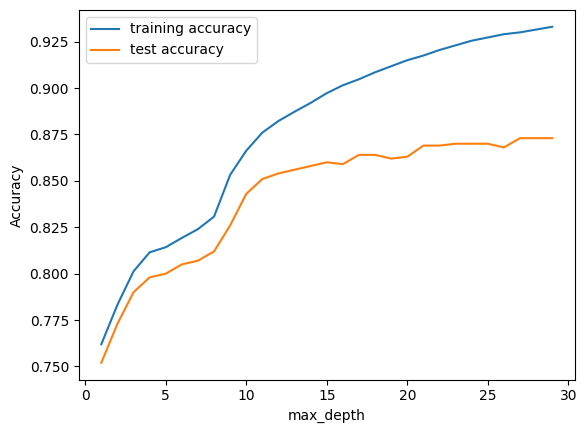

In [26]:
training_accuracy = []
test_accuracy = []

depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy


    test_accuracy.append(tree_test.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

In [27]:
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,recall_score_train_tree,precision_score_train_tree)

In [28]:
forest = RandomForestClassifier(n_estimators=13)

#fit the model
forest.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#computing accuracy, score, recall, precision of the model
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.893

Random Forest : f1_score on training Data: 0.983
Random Forest : f1_score on test Data: 0.791

Random Forest : Recall on training Data: 0.971
Random Forest : Recall on test Data: 0.698

Random Forest : precision on training Data: 0.995
Random Forest : precision on test Data: 0.825


In [29]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       709
           1       0.91      0.70      0.79       291

    accuracy                           0.89      1000
   macro avg       0.90      0.84      0.86      1000
weighted avg       0.89      0.89      0.89      1000



In [30]:
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,recall_score_train_forest,precision_score_train_forest)

In [31]:
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

#fit the model
gbc.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

#computing accuracy, score, recall, precision of the model
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boost: Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boost: Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boost : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boost : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc = metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boost : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boost : Recall on test Data: {:.3f}".format(recall_score_train_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boost : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boost : precision on test Data: {:.3f}".format(precision_score_train_gbc))

Gradient Boost: Accuracy on training Data: 0.987
Gradient Boost: Accuracy on test Data: 0.870

Gradient Boost : f1_score on training Data: 0.977
Gradient Boost : f1_score on test Data: 0.731

Gradient Boost : Recall on training Data: 0.958
Gradient Boost : Recall on test Data: 0.958

Gradient Boost : precision on training Data: 0.996
Gradient Boost : precision on test Data: 0.996


In [32]:
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       709
           1       0.92      0.61      0.73       291

    accuracy                           0.87      1000
   macro avg       0.89      0.79      0.82      1000
weighted avg       0.88      0.87      0.86      1000



In [33]:
storeResults('Gradient Boost ',acc_test_gbc,f1_score_test_gbc,recall_score_train_gbc,precision_score_train_gbc)
     

In [34]:
result = pd.DataFrame({ 'ML Model' : ml_model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.889,0.781,0.890,0.995
1,K-Nearest Neighbors,0.819,0.655,1.000,1.000
2,Support Vector Machine,0.871,0.731,0.837,0.988
3,Decision Tree,0.869,0.756,0.804,0.927
4,Random Forest,0.893,0.791,0.971,0.995
5,Gradient Boost,0.870,0.731,0.958,0.996


In [35]:
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.893,0.791,0.971,0.995
1,Logistic Regression,0.889,0.781,0.890,0.995
2,Support Vector Machine,0.871,0.731,0.837,0.988
3,Gradient Boost,0.870,0.731,0.958,0.996
4,Decision Tree,0.869,0.756,0.804,0.927
5,K-Nearest Neighbors,0.819,0.655,1.000,1.000


In [ ]:
import pickle

with open("PhishingDomainDetection.pkl", "wb") as file:
  pickle.dump(svc,file)